# Project Planning Individual Stage

In [2]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## 1. Data Description

### players.csv

This data shows the identities of players and their experiences and behaviours in the game. The data has a total of **196 observations** and **7 variables**.
The variables are as listed below:

| **Variable**     | **Type** | **Description**                     | **Notes** |
|------------------|----------|--------------------------------------|-----------|
| `experience`     | chr      | Players gaming experience level (Beginner, Amateur, Regular, Veteran, Pro) | Might be subjectively classified. |
| `subscribe` | lgl | Whether each player subscribed (TRUE) to a game-related newsletter or not (FALSE)  | Can be used as a target variable for prediction |
| `hashedEmail` | chr | Player ID | 196 different IDs. Can act as an identification for each player |
| `played_hours` | dbl | Number of hours played by each player | Might be right-skewed with some invalid data |
| `name` | chr | The name of each player | 196 different names. Can act as the same function as `hashedEmail` | 
| `gender` | chr | The gender of each player | Mostly male/female. Some group of gender might be  |
| `Age` | dbl | The age of each player | Have two missing values. Can be used as a predictor. |

### Potential Data Issues

- Two missing values in `Age` can lead to error in data processing
- The number in `played_hours` is might be right-skewed (many low-hour players, few high-hour players)
- Some values in the `played_hours` column is 0.0, which means the player played for 0.0 hours, and can be invalid.
- `gender` column is dominated by `Male` and `Female`. Therefore, other assigned genders might be underrepresented in the data processing.
- The values in the `experience` column might be subjective since there is not formal definition of each gaming experiences.

### Likely Data Collection Method

- `subscribe` data is collected from the in-app subscription data.
- `experience`, `name`, `gender`, and `Age` data is likely to be user-input data.
- `played_hours` likely comes from platform usage logs.

### Summary Statistics

In [3]:
players <- read_csv("data/players.csv")

players |> summarise(
    played_hours_mean = mean(played_hours, na.rm=TRUE),
    age_mean = mean(Age, na.rm = TRUE),
    played_hours_median = median(played_hours, na.rm=TRUE),
    total_players = n(),
    subscribe_count = sum(subscribe == "TRUE", na.rm=TRUE),
    subscribe_percentage = subscribe_count / total_players *100)|>
    round(2)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


played_hours_mean,age_mean,played_hours_median,total_players,subscribe_count,subscribe_percentage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,0.1,196,144,73.47


- Mean Played Hours = 5.85 hours
- Mean Age = 21.14
- Median Played Hours = 0.1 hours
- Total Players = 196 people
- Count Subscribe = 144
- Percentage of Players subscribed to newsletter = 73.47%

## 2. Question

### Broad Question: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question:
Can the player's age, total gameplay time, and game experience predict if a player is subscribed to a game-related newsletter or not in `players.csv`?

## 3. Exploratory Data Analysis and Visualization

In [4]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [5]:
head(players)

nrow(players)
ncol(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

In [6]:
glimpse(players)
summary(players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

### Mean Value of Quantitative Columns

In [7]:
players_mean <- players|>
                select(played_hours, Age) |>
                map_df(mean, na.rm=TRUE)|>
                rename_with(~ c("played_hours_mean", "age_mean"))

players_mean

played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


- The average played hours of the players is 5.85 hours.
- The average age of the players is 21.14 years old.

### Visualization

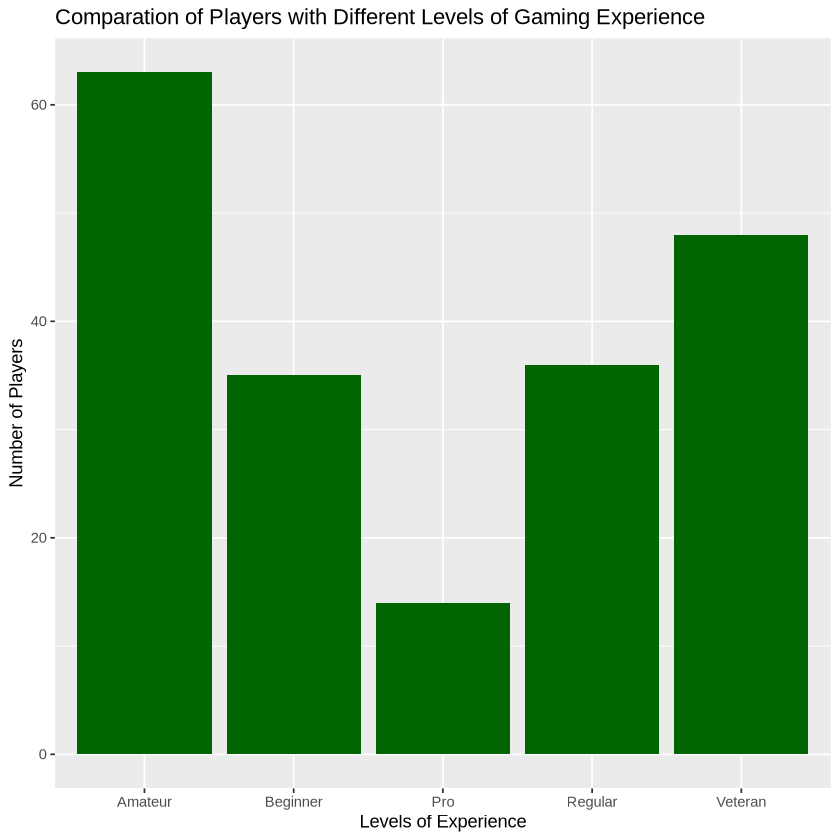

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


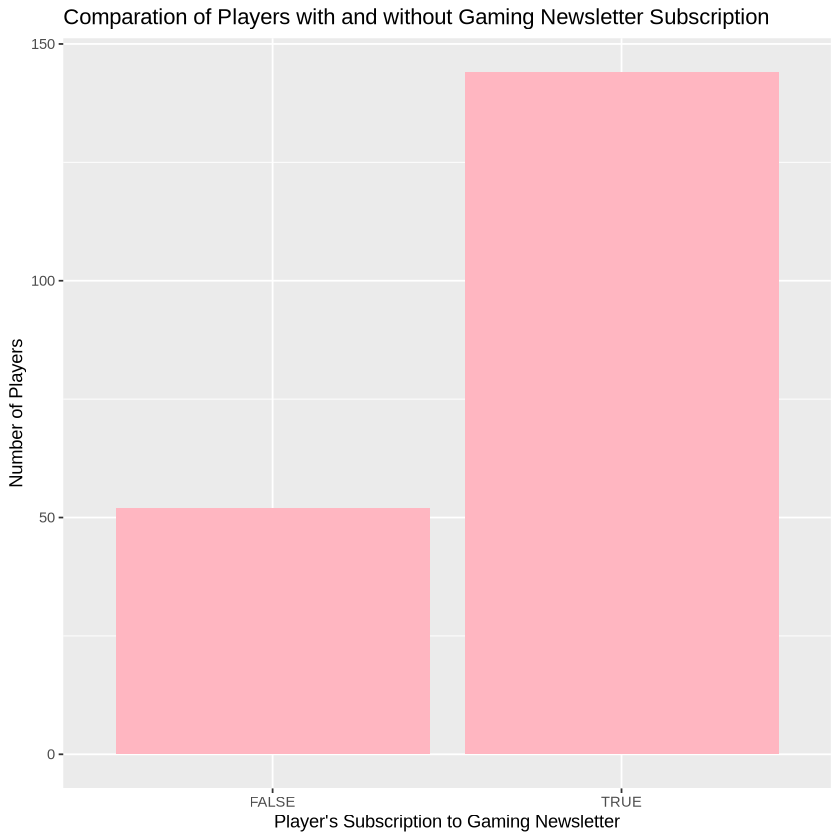

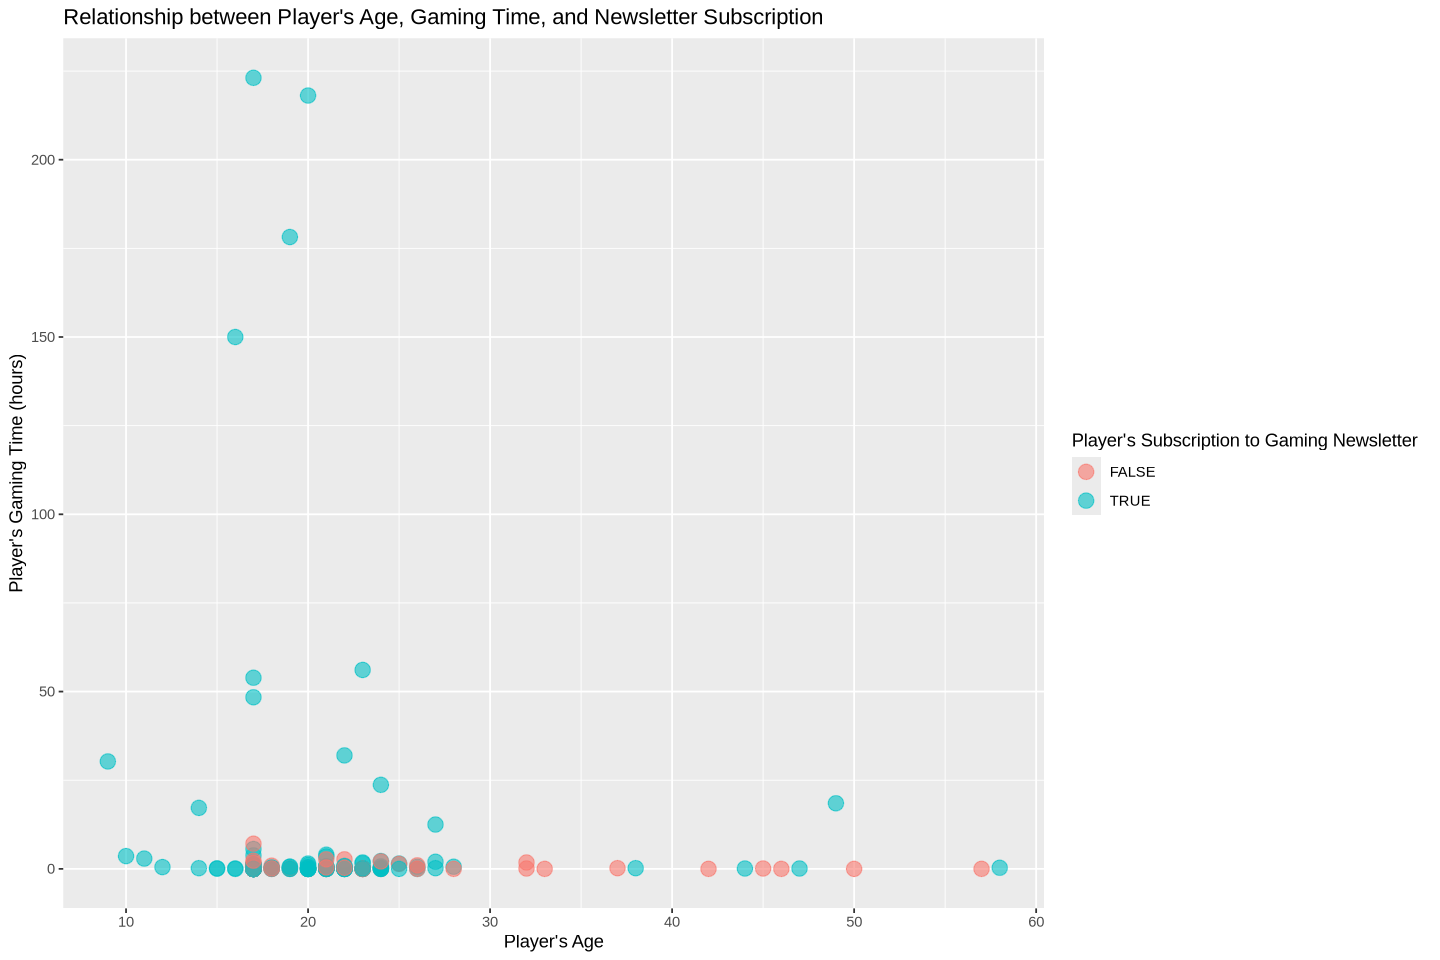

In [8]:
experience_bar <- ggplot(players, aes(x=experience)) +
            geom_bar( fill="darkgreen")+
            labs(x= "Levels of Experience", y= "Number of Players")+
            ggtitle("Comparation of Players with Different Levels of Gaming Experience")
experience_bar

subscribe_bar <- ggplot(players, aes(x=subscribe)) +
            geom_bar( fill="lightpink")+
            labs(x= "Player's Subscription to Gaming Newsletter", y= "Number of Players")+
            ggtitle("Comparation of Players with and without Gaming Newsletter Subscription")
subscribe_bar

options(repr.plot.width = 12, repr.plot.height = 8) 
age_time_plot<- ggplot(players, aes(x= Age, y= played_hours, color=subscribe)) +
            geom_point(size=4, alpha=0.6)+
            labs(x= "Player's Age", y= "Player's Gaming Time (hours)", color= "Player's Subscription to Gaming Newsletter")+
            ggtitle("Relationship between Player's Age, Gaming Time, and Newsletter Subscription")
age_time_plot

### Visualization Insights

#### Comparation of Players with Different Levels of Gaming Experience

- Most of the players are considered Amateur.
- The data for the variable `experience` is equally spreaded and not highly dominated by one type of player experience.
- The least type of experience the players have is Pro.

#### Comparation of Players with and without Gaming Newsletter Subscription

- Most players are subscribed to the gaming newsletter.
- Around 75% of the players are subscribed to the newsletter and around 25% are not subscribed to the newsletter.

#### Relationship between Player's Age, Gaming Time, and Newsletter Subscription

- The relationship between Player's Age and gaming time is considerably weak.
- There are more players under the age of 30 than over the age of 30.
- People who spend a long time in the game is most likely eople under the age of 30.
- People who are not subscribed to the game-related newsletter are people who spend small amount of time in the game.

## 4. Methods and Plan

The most appropriate method for predicting the `subscribe` variable is to use KNN predictions.

#### Why is this method appropriate?
Because we are predicting a qualitative outcome (TRUE or FALSE).

#### Which assumptions are required, if any, to apply the method selected?
- Observations close to each other are assumed to have similar outcome.
- Variables should be standardized to ensure no one-sided domination.

#### What are the potential limitations or weaknesses of the method selected?
- KNN might be slow if working on large datasets.
- Variables that are not standardized can make the predictions biased.
- KNN prediction might not be accurate for data with uneven distribution.
- Prediction can degrade when datasets has many features.
- Prediction can be easily disturbed by noisy data and outliers.

#### How are you going to compare and select the model?
- I will use k-fold cross-validation on the training data to test different KNN settings (number of neighbors k, distance metric, and weighting).
- The model with the highest cross-validation performance will be selected and then evaluated once on the separate test set to confirm its generalization.

#### How are you going to process the data to apply the model? 
- I will divide the data into training and testing dataset with the ratio 7:3.
- I will standardize the predictors in the training dataset.
- I will apply K-fold cross-validation to training dataset to find out which K value will be the most accurate for predicting the data.
- I will apply the best K value to the testing dataset to evaluate the accuracy of the KNN model.
- The best model will be used to predict new observations.

# Github Repository
Link: https://github.com/albertmelky/dsci100project_albert.git